Fire Incidents

In [11]:
#Importing pandas
import pandas as pd

An example of what the csv looks like:

In [12]:
#Reading from the csv
fire = pd.read_csv("fire_incidents.csv")
fire.head(20)

,_id,call_no,incident_type,type_description,address,alarms,alarm_time,primary_unit,census_tract,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1,F160029985,111.0,Building fire,"800 BLOCK CENTER ST, WILKINSBURG PA 15221",1,2016-04-21T05:01:04,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-16,40.441275,-79.882485
1,2,F180022058,111.0,Building fire,"1100 BLOCK JANE ST, WILKINSBURG PA 15221",1,2018-03-13T08:34:43,231EN16,NaN,NaN,NaN,NaN,4.200356e+10,NaN,NaN,NaN,3-21,40.436342,-79.881003
2,3,F180022102,131.0,Passenger vehicle fire,"SB STATE HWY 28 SB AT 31S, PITTSBURGH PA 15212",0,2018-03-13T11:54:23,231EN32,2406.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-1A,NaN,NaN
3,4,F170043431,131.0,Passenger vehicle fire,"1700 BLOCK BELLEAU DR, PITTSBURGH PA 15212",0,2017-05-31T08:39:47,231EN38,2509.0,Fineview,6.0,25.0,4.200325e+10,1.0,25.0,1.0,1-10,40.460303,-80.006980
4,5,F180021111,111.0,Building fire,"2400 BLOCK VILLAGE RD, PITTSBURGH PA 15205",1,2018-03-09T10:26:42,231EN31,2808.0,Fairywood,2.0,28.0,4.200356e+10,5.0,28.0,6.0,1-16,40.449009,-80.076607
5,6,F180021782,150.0,"Outside rubbish fire, Other","S 7TH ST & E CARSON ST, PITTSBURGH PA 15203",0,2018-03-12T09:13:28,231EN24,1702.0,South Side Flats,3.0,17.0,4.200317e+10,4.0,17.0,3.0,4-2,40.428618,-79.992239
6,7,F180022495,113.0,"Cooking fire, confined to container","200 BLOCK E OHIO ST, PITTSBURGH PA 15212",1,2018-03-14T19:46:10,231EN32,2204.0,Allegheny Center,1.0,22.0,4.200356e+10,1.0,22.0,1.0,1-6,40.453022,-80.003660
7,8,F180022546,111.0,Building fire,"7000 BLOCK LEMINGTON AVE, PITTSBURGH PA 15206",1,2018-03-14T23:49:22,231EN15,1203.0,Lincoln-Lemington-Belmar,9.0,12.0,4.200312e+10,2.0,12.0,5.0,3-18,40.471358,-79.898240
8,9,F180022773,111.0,Building fire,"100 BLOCK SPENCER AVE, PITTSBURGH PA 15227",1,2018-03-15T20:39:05,231EN23,2904.0,Carrick,4.0,29.0,4.200329e+10,4.0,29.0,3.0,4-15,40.385494,-79.977200
9,10,F170044316,131.0,Passenger vehicle fire,"1200 BLOCK WESTFIELD ST, PITTSBURGH PA 15216",0,2017-06-03T01:31:13,231EN28,1916.0,Beechview,4.0,19.0,4.200319e+10,5.0,19.0,6.0,4-28,40.415219,-80.019516


Creating a dictionary to determine how many fire incidents each neighborhood had

In [13]:
newdict = dict()

#Iterates through each row in the csv and either creates a new dictionary entry
#for the neighborhood or adds to the count for already existing ones
for index, row in fire.iterrows():
    if fire.neighborhood[index] in newdict:
        number = newdict[fire.neighborhood[index]]
        newdict[fire.neighborhood[index]] = number + 1
    else:
        newdict[fire.neighborhood[index]]=1
        
#Demonstration of the contents of the dictionary
print(newdict)

{nan: 1396, 'Fineview': 48, 'Fairywood': 26, 'South Side Flats': 260, 'Allegheny Center': 62, 'Lincoln-Lemington-Belmar': 193, 'Carrick': 283, 'Beechview': 146, 'Allentown': 125, 'Beltzhoover': 129, 'Crafton Heights': 84, 'Homewood North': 182, 'Squirrel Hill South': 252, 'Perry North': 108, 'Bedford Dwellings': 42, 'Homewood South': 189, 'East Allegheny': 130, 'Crawford-Roberts': 108, 'Sheraden': 172, 'Middle Hill': 104, 'Strip District': 61, 'East Hills': 154, 'Garfield': 109, 'Greenfield': 114, 'North Shore': 64, 'Spring Hill-City View': 103, 'Central Business District': 266, 'Upper Hill': 44, 'Manchester': 78, 'Overbrook': 57, 'Polish Hill': 39, 'Central Lawrenceville': 74, 'Brookline': 187, 'Marshall-Shadeland': 141, 'North Oakland': 125, 'South Oakland': 91, 'Homewood West': 61, 'East Liberty': 207, 'Hazelwood': 244, 'Squirrel Hill North': 130, 'Friendship': 32, 'West Oakland': 61, 'Terrace Village': 85, 'Brighton Heights': 153, 'Troy Hill': 84, 'Windgap': 23, 'Knoxville': 178, '

Determining which neighborhood had the least and how many they had

In [14]:
least = 10000
order = []
order_num = []
new_list = []
new_two = []

for item in newdict:
    if newdict[item] < least:
        neigh = item
        least = newdict[item]
    order.append(item)
    order_num.append(newdict[item])
        
while order_num:
    minimum = order_num[0]
    place = order[0]
    hold = 0
    for x in order_num: 
        if x < minimum:
            minimum = x
            place = order[hold]
        hold += 1
            
    new_list.append(minimum)
    order_num.remove(minimum)
    new_two.append(place)
    order.remove(place)

order_num = new_list
order = new_two

print(neigh)
print(least)
print(order)
print(order_num)

Mount Oliver Borough
6
['Mount Oliver Borough', 'Regent Square', 'East Carnegie', 'Mt. Oliver', 'Ridgemont', 'St. Clair', 'Arlington Heights', 'Oakwood', 'Swisshelm Park', 'Chartiers City', 'Glen Hazel', 'Summer Hill', 'New Homestead', 'Bon Air', 'West End', 'Esplen', 'Windgap', 'South Shore', 'Spring Garden', 'Hays', 'Fairywood', 'Westwood', 'Friendship', 'Morningside', 'Polish Hill', 'California-Kirkbride', 'Duquesne Heights', 'Chateau', 'Bedford Dwellings', 'Allegheny West', 'Upper Hill', 'Fineview', 'Point Breeze North', 'Upper Lawrenceville', 'Arlington', 'Lower Lawrenceville', 'Overbrook', 'Stanton Heights', 'Banksville', 'Strip District', 'Homewood West', 'West Oakland', 'Allegheny Center', 'North Shore', 'Lincoln Place', 'Northview Heights', 'Point Breeze', 'Elliott', 'Central Lawrenceville', 'Manchester', 'Highland Park', 'Crafton Heights', 'Troy Hill', 'Terrace Village', 'South Oakland', 'Central Oakland', 'South Side Slopes', 'Spring Hill-City View', 'Middle Hill', 'Perry No

A plot for a visual representation of fire incidents or the ten neightborhoods with the least

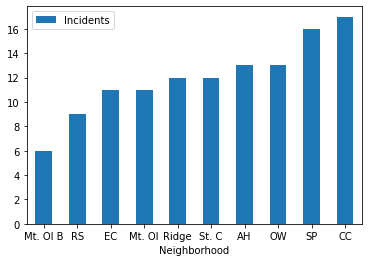

In [15]:
df = pd.DataFrame({'Neighborhood':['Mt. Ol B', 'RS', 'EC', 'Mt. Ol', 'Ridge', 'St. C', 'AH', 'OW', 'SP', 'CC'], 'Incidents':[6, 9, 11, 11, 12, 12, 13, 13, 16, 17]})
ax = df.plot.bar(x='Neighborhood', y='Incidents', rot=0)

Finding the earliest dated fire:

In [18]:
when = dict()

for index, row in fire.iterrows():
    time = str(fire.alarm_time[index])
    time = time[:4]
    if time in when:
        number = when[time]
        when[time] = number + 1
    else:
        when[time]=1

print(when)

{'2016': 1054, '2018': 687, '2017': 930, '2013': 1071, '2015': 1114, '2014': 1065, 'nan': 18, '2019': 741, '2020': 810, '2021': 776, '2022': 728, '2023': 537}


The earliest fire was in 2013.